In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.warn('ignore')
%matplotlib inline

<ipython-input-1-5ea2fb8368b8>:9: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'breast-cancer.data',
 'breast-cancer.names',
 'Untitled.ipynb']

In [3]:
with open('breast-cancer.names') as f:
    print(f.read())
cols = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
        'breast', 'breast-quad', 'irradiat'] 
data = pd.read_csv('breast-cancer.data', header = None, names = cols)
data.head()

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
display(data.describe())
display(data.info())

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


None

## Data Wrangling

In [6]:
print(len(data))
for col in data.columns.tolist():
    unknown = data[data[col] == '?'].index
    if len(unknown) > 0:
        data.drop(index = unknown, inplace = True)
print(len(data))

286
277


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
# Remaps - Categorical variables
breast_cancer = data.copy()
breast_cancer['Class'] = breast_cancer.apply(lambda x: 1 if x['Class'] == 'recurrence-events' else 0, axis = 1)
breast_cancer['irradiat'] = breast_cancer.apply(lambda x: 1 if x['irradiat'] == 'yes' else 0, axis = 1)
breast_cancer['node-caps'] = breast_cancer.apply(lambda x: 1 if x['node-caps'] == 'yes' else 0, axis = 1)

In [8]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [9]:
# One Hot Encoding categorical Variables
from sklearn.preprocessing import OneHotEncoder

cols = ['menopause', 'age', 'tumor-size', 'inv-nodes', 'breast', 'breast-quad']

for col in cols:
    ohe = OneHotEncoder().fit(data[col].values.reshape(-1,1))
    ohe_cols = list(map(lambda val: col + '_' + str(val), ohe.categories_[0]))
    print(ohe_cols)
    ohe_frame = pd.DataFrame(ohe.transform(data[col].values.reshape(-1,1)).toarray(), columns = ohe_cols)
    breast_cancer = pd.concat([breast_cancer, ohe_frame], join = 'inner', axis = 1)
    breast_cancer.drop(columns = {col}, inplace = True)
breast_cancer.head()

['menopause_ge40', 'menopause_lt40', 'menopause_premeno']
['age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69', 'age_70-79']
['tumor-size_0-4', 'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54']
['inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17', 'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11']
['breast_left', 'breast_right']
['breast-quad_central', 'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up']


,Class,node-caps,deg-malig,irradiat,menopause_ge40,menopause_lt40,menopause_premeno,age_20-29,age_30-39,age_40-49,...,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,0,3,0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,2,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,2,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0,2,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Model Fit

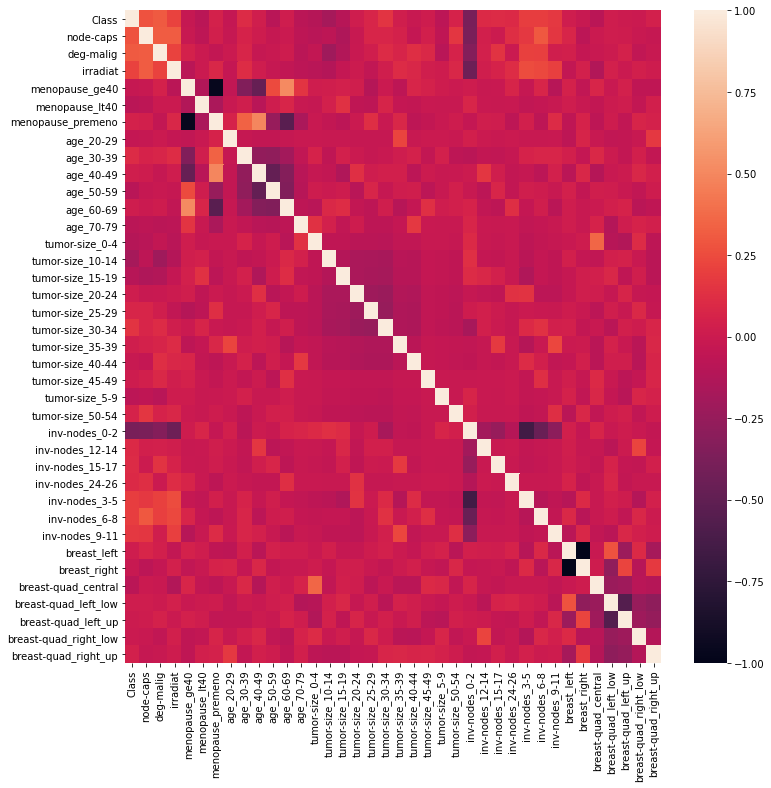

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(breast_cancer.corr())

In [22]:
X = breast_cancer.drop(columns = 'irradiat')
Y = breast_cancer.loc[:, 'irradiat']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(len(X_train))
print(len(X_test))

214
54


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import math

alpha = [n for n in range(1, 30, 2)]
argmax = 0
best_param = int

for param in alpha:
    model = KNeighborsClassifier(n_neighbors = param)
    knn = model.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    score = precision_score(Y_test, preds, average = None)[0]
    if score > argmax:
        argmax = score
        best_param = param
        
# Show best parameter
print(best_param, argmax)

# rerun classification report for best parameter
model = KNeighborsClassifier(n_neighbors = best_param)
knn = model.fit(X_train, Y_train)
preds = knn.predict(X_test)
print(precision_score(Y_test, preds, average = None)[0])
print(confusion_matrix(Y_test, preds))
print(classification_report(Y_test, preds))

3 0.8541666666666666
0.8541666666666666
[[41  3]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.50      0.30      0.37        10

    accuracy                           0.81        54
   macro avg       0.68      0.62      0.63        54
weighted avg       0.79      0.81      0.80        54



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
